# 带钢表面缺陷分类识别

### 1.导入相关的Python包

In [5]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.metrics import classification_report


### 2.数据预处理

#### 导入数据集

In [7]:
# 屏蔽所有警告信息
warnings.filterwarnings('ignore')
# 以 DataFrame 的形式导入标签文件
labels_pd = pd.read_csv('Faults27x7_var', header=None, prefix="0")
# 提取出标签文件的数据
labels_data = labels_pd.values
# 以 DataFrame的形式导入数据集
dataset = pd.read_table('Faults.tsv', header=None, prefix="0")
# 设置数据集的标签
feature_names = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']
class_names = ['Pastry','Z_Scratch','K_Scratch','Stains','Dirtiness','Bumps','Other_Faults']
columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
dataset.columns = columns
# 查看数据集
dataset

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


#### 查看数据基本信息

In [59]:
# 查看数据集大小
dataset.shape

(1941, 34)

#### 查看数据集是否有缺失值和离散值

In [60]:
# 查看数据集是否有缺失值
dataset.shape[0] - dataset.count(0)

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

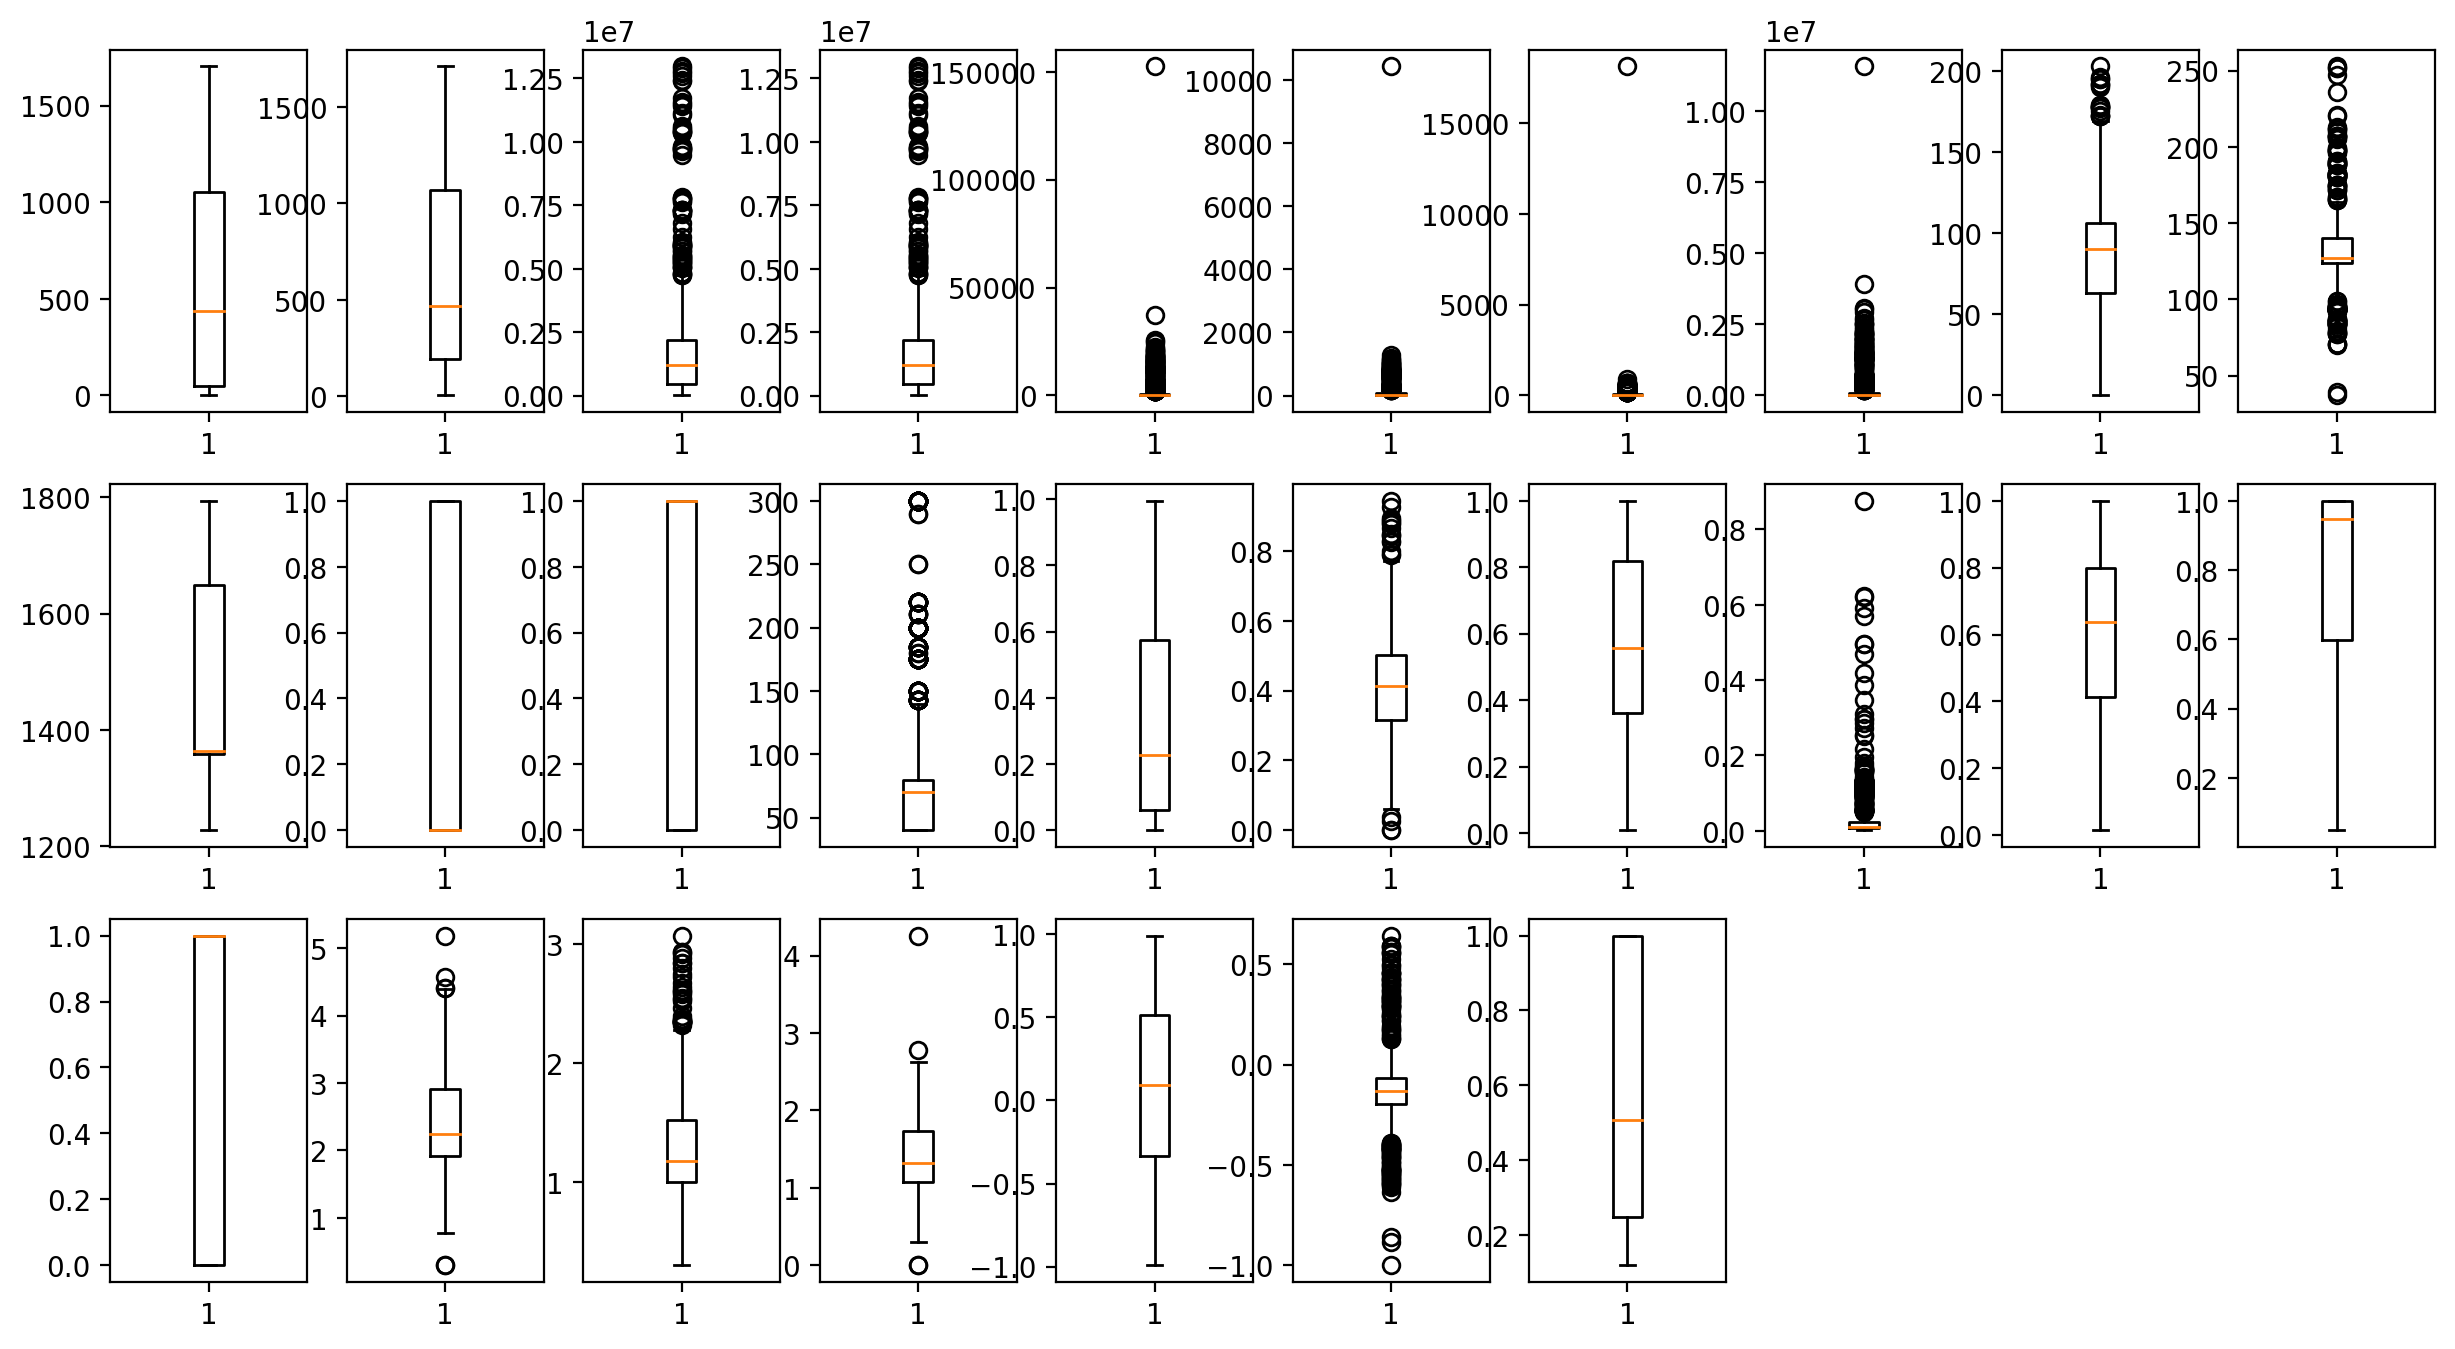

In [61]:
# 查看数据集是否有离散值
# 1.箱型图法
plt.figure(figsize=(15, 8))
for i in range(1, 28, 1):
    plt.subplot(3, 10, i)
    plt.boxplot(dataset[dataset.columns[i - 1]])

In [62]:
# 2.局部离群值因子法(LOF)
clf = LocalOutlierFactor(n_neighbors=20)  # 近邻数是超参数，20为默认值，一般取该值效果不错
dataset_LOF_copy = dataset[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']].copy()
y_pred = clf.fit_predict(np.array(dataset_LOF_copy))  # 结果中-1表离群样本，1表正常样本
LOF_arr = dataset[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']][y_pred==-1]
LOF_arr

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
4,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0
14,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1749,0,0,0,0,0,0,1
1763,0,0,0,0,0,0,1
1863,0,0,0,0,0,0,1
1891,0,0,0,0,0,0,1


#### 将输入特征与输出特征分开

In [63]:
X = dataset[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']]
# 将dataset数据集转为二维数组
dataset_data = dataset.values
# 将原数据集的Y化简到1维，Pastry为1，Z_Scratch为2，以此类推直到7
Y_data = []
for i in range(len(dataset_data)):
    for j in range(27, 34, 1):
        if (dataset_data[i][j] == 1):
           Y_data.append(j - 27 + 1)
# 将Y的数据转为英文，便于分析
for i in range(len(Y_data)):
    if (Y_data[i] == 1):
        Y_data[i] = 'Pastry'
    elif (Y_data[i] == 2):
        Y_data[i] = 'Z_Scratch'
    elif (Y_data[i] == 3):
        Y_data[i] = 'K_Scratch'
    elif (Y_data[i] == 4):
        Y_data[i] = 'Stains'
    elif (Y_data[i] == 5):
        Y_data[i] = 'Dirtiness'
    elif (Y_data[i] == 6):
        Y_data[i] = 'Bumps'
    elif (Y_data[i] == 7):
        Y_data[i] = 'Other_Faults'
# 输出集
Y = pd.DataFrame(Y_data)
Y.columns = ['category']
Y

,category
0,Pastry
1,Pastry
2,Pastry
3,Pastry
4,Pastry
...,...
1936,Other_Faults
1937,Other_Faults
1938,Other_Faults
1939,Other_Faults


#### 对输入数据做标准化

In [64]:
X = StandardScaler().fit_transform(X.values)

#### 构造模型评价函数

In [65]:
def showCVResults(cv_results):
    print('fit_time:%.4f' % cv_results['fit_time'].mean())
    print('score_time:%.4f' % cv_results['score_time'].mean())
    print('accuracy:%.4f' % cv_results['test_accuracy'].mean())
    print('precision_weighted:%.4f' % cv_results['test_precision_weighted'].mean())
    print('recall_weighted:%.4f' % cv_results['test_recall_weighted'].mean())
    print('f1_weighted:%.4f' % cv_results['test_f1_weighted'].mean())
    print('precision_macro:%.4f' % cv_results['test_precision_macro'].mean())
    print('recall_macro:%.4f' % cv_results['test_recall_macro'].mean())
    print('f1_macro:%.4f' % cv_results['test_f1_macro'].mean())

#### 构造分层的交叉验证迭代器并分离训练集和测试集

In [66]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
# 分层划分训练集和测试集，使训练集、测试集中各类别样本数量比例与原始数据集保持一致
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=3, stratify=Y)
# test_size:  若为小数，则为测试集样本占总样本的比例；若为整数，则为测试集样本数量
# random_state：随机数的种子，在需要重复试验的时候，指定一个固定值，则得到相同的划分结果
# stratify：划分前是否打乱原始样本顺序
y_train.value_counts()  # 训练集中各类样本数量统计

category    
Other_Faults    605
Bumps           362
K_Scratch       352
Z_Scratch       171
Pastry          142
Stains           65
Dirtiness        49
dtype: int64

In [67]:
# 测试集中各类样本数量统计
y_test.value_counts()

category    
Other_Faults    68
Bumps           40
K_Scratch       39
Z_Scratch       19
Pastry          16
Stains           7
Dirtiness        6
dtype: int64

### 3.使用决策树进行分类

In [68]:
# 不做任何剪枝操作的决策树拟合
dtc = DecisionTreeClassifier(criterion="gini", splitter="best")
# 执行交叉验证并进行多指标评估
cv_results_dt = cross_validate(estimator=dtc, X=X, y=Y, cv=skf, scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted", "precision_macro", "recall_macro", "f1_macro"])
showCVResults(cv_results_dt)

fit_time:0.0601
score_time:0.0112
accuracy:0.7311
precision_weighted:0.7330
recall_weighted:0.7311
f1_weighted:0.7294
precision_macro:0.7528
recall_macro:0.7659
f1_macro:0.7549


In [78]:
# 将决策树进行完整的可视化
dtc.fit(X_train, y_train)
export_graphviz(dtc, out_file="D://tree.dot",
                feature_names=feature_names, class_names=class_names,
                filled=True, rounded=True,special_characters=True)

[0.         0.00045495 0.00050115 0.00052501 0.00052501 0.00052868
 0.00053456 0.00054092 0.00054589 0.00055153 0.00055153 0.00055589
 0.00055767 0.00056128 0.00056656 0.0005683  0.00057274 0.00057274
 0.00057274 0.00057274 0.00057274 0.00057274 0.00057274 0.00057274
 0.00057274 0.00057274 0.00057274 0.00057274 0.00057274 0.00057274
 0.00068729 0.00071271 0.00076365 0.00076365 0.00076365 0.00076365
 0.00076365 0.00076365 0.00076365 0.00076365 0.00076365 0.00085911
 0.00085911 0.00085911 0.00085911 0.00085911 0.00085911 0.00085911
 0.00085911 0.00085911 0.00085911 0.00085911 0.00085911 0.00086778
 0.0008782  0.00090631 0.00090683 0.00091638 0.00091638 0.00091638
 0.00095456 0.00095456 0.00095456 0.00095456 0.00095456 0.00095456
 0.00095456 0.00095456 0.00095456 0.00095456 0.00097659 0.00098184
 0.00098184 0.00098184 0.00098184 0.00098456 0.00100229 0.00100229
 0.00100229 0.00100988 0.00102426 0.00102938 0.00103093 0.00103093
 0.00103093 0.00103093 0.00103093 0.00103093 0.00103093 0.0010

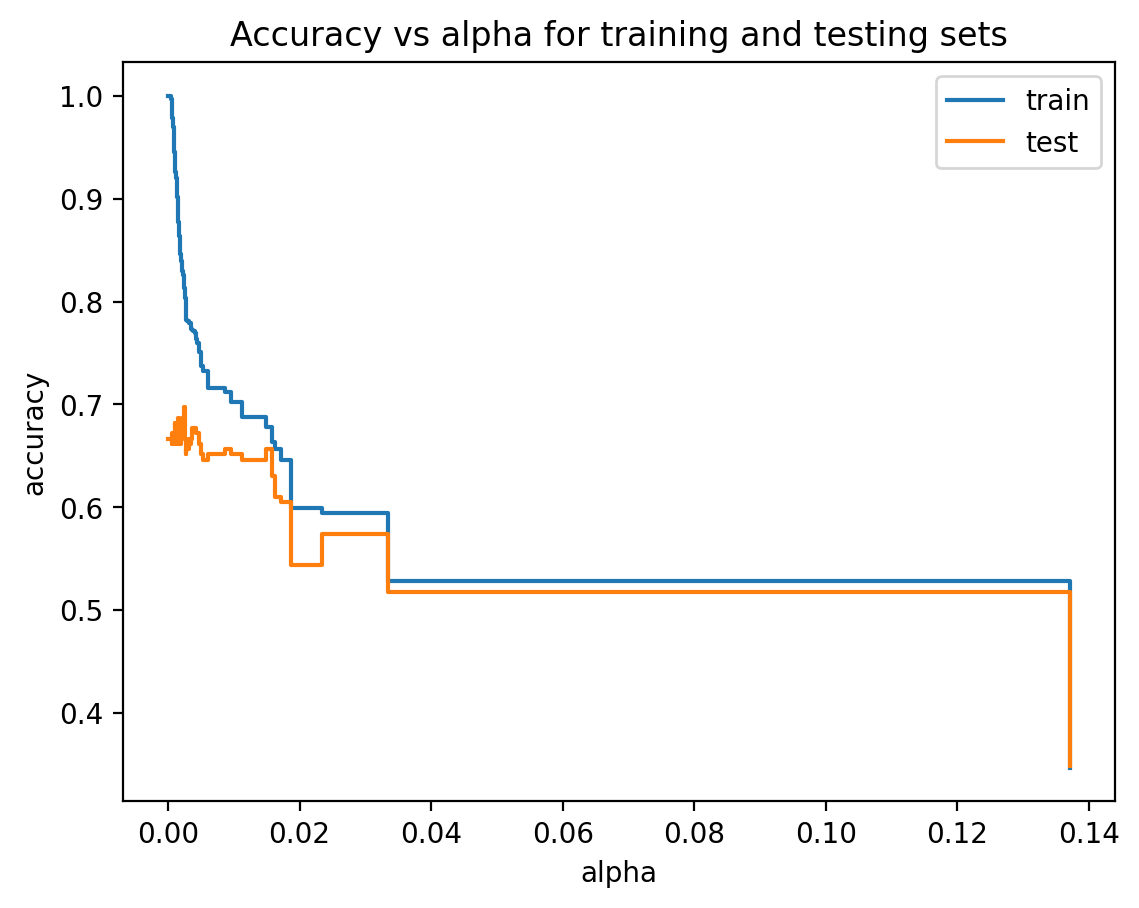

In [26]:
# 对决策树进行预剪枝和后剪枝
# 后剪枝
path = dtc.cost_complexity_pruning_path(X_train, y_train)
#cost_complexity_pruning_path：返回两个参数，
#第一个是CCP剪枝后决策树序列T0,T1,...,Tt对应的误差率增益率α；第二个是剪枝后决策树所有叶子节点的不纯度
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
# ccp_alpha_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
#输出最后一个数的节点个数和ccp_alphas
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
plt.rcParams['savefig.dpi'] = 80 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600*400
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='', label="test",
        drawstyle="steps-post")
ax.legend()

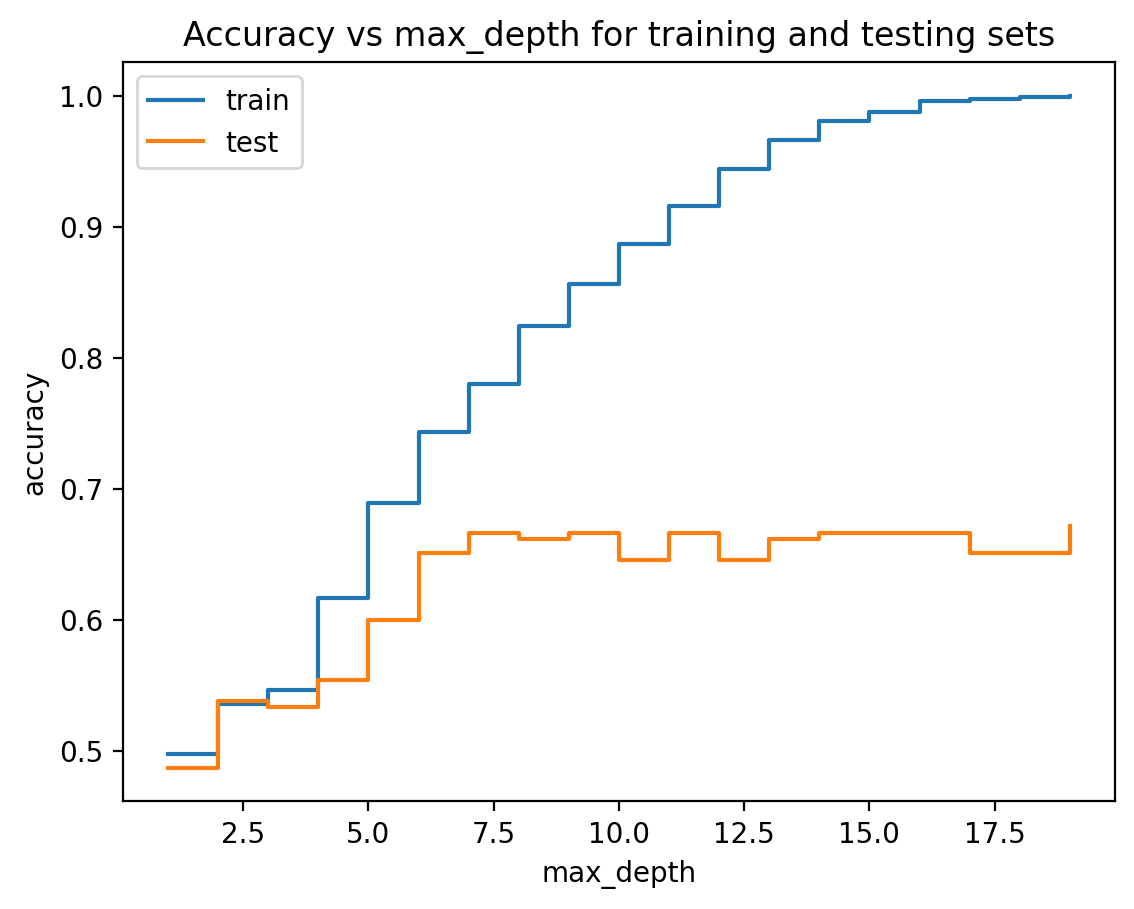

In [27]:
# 预剪枝
max_depth = np.arange(1, 20, 1)
dtcs = []
for i in max_depth:
    dtc = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=i)
    dtc.fit(X_train, y_train)
    dtcs.append(dtc)
train_scores = [dtc.score(X_train, y_train) for dtc in dtcs]
test_scores = [dtc.score(X_test, y_test) for dtc in dtcs]
plt.rcParams['savefig.dpi'] = 80 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600*400
fig, ax = plt.subplots()
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs max_depth for training and testing sets")
ax.plot(max_depth, train_scores, marker='', label="train",
        drawstyle="steps-post")
ax.plot(max_depth, test_scores, marker='', label="test",
        drawstyle="steps-post")
ax.legend()

In [73]:
# 使用网格搜索法寻求最优参数
dtc = DecisionTreeClassifier(criterion="gini", splitter="best")
param_grid = [
    {
        'max_depth': np.arange(1, 20, 1),
        'ccp_alpha': [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
    }
]
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring="accuracy", cv=skf)
grid_search.fit(X, Y)
# 最佳模型得分
print(grid_search.best_score_)

# 最佳的模型参数
print(grid_search.best_params_)

0.7362199312714777
{'ccp_alpha': 0, 'max_depth': 11}


In [75]:
dtc = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=11, ccp_alpha=0)
# 执行交叉验证并进行多指标评估
cv_results_dt = cross_validate(estimator=dtc, X=X, y=Y, cv=skf, scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted", "precision_macro", "recall_macro", "f1_macro"])
showCVResults(cv_results_dt)

fit_time:0.0247
score_time:0.0063
accuracy:0.7378
precision_weighted:0.7454
recall_weighted:0.7378
f1_weighted:0.7385
precision_macro:0.7710
recall_macro:0.7589
f1_macro:0.7592


In [80]:
# 将决策树进行完整的可视化
dtc.fit(X_train, y_train)
export_graphviz(dtc, out_file="D://tree.dot",
                feature_names=feature_names,class_names=class_names,
                filled=True, rounded=True,special_characters=True)

### 4.支持向量机

In [84]:
model_svm = SVC(kernel='rbf', gamma=0.1, C=1)
model_svm.fit(X_train, y_train)
cv_results_lr = cross_validate(estimator=model_svm, X=X, y=Y, cv=skf, scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted", "precision_macro", "recall_macro", "f1_macro"])
showCVResults(cv_results_lr)

fit_time:0.3258
score_time:0.1228
accuracy:0.7707
precision_weighted:0.7759
recall_weighted:0.7707
f1_weighted:0.7690
precision_macro:0.8098
recall_macro:0.7666
f1_macro:0.7812


In [87]:
param_grid = [
    {
        'C': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
              1.9, 2.0],
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
    }
]
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, scoring="accuracy", cv=skf)
grid_search.fit(X, Y)
# 最佳模型得分
print(grid_search.best_score_)
# 最佳的模型参数
print(grid_search.best_params_)

0.7774253238170763
{'C': 1.8, 'kernel': 'rbf'}
